# Projet analyse de donnée : Effet du covid sur les Valeurs fonciere.

## Rapport d'analyse

#### Nettoyage des Données : 
Pour préparer notre analyse, nous avons commencé par nettoyer les données. Cette étape a impliqué la suppression des colonnes non renseignées ou inutiles à notre étude. De plus, nous avons éliminé certaines lignes : celles contenant des doublons et celles avec des valeurs incohérentes, par exemple, celles où Vf < 1000.

#### Sélection et Traitement des Données : 
Nous avons ensuite décidé de nous concentrer uniquement sur les données relatives aux ventes (ventes, ventes à l’état future et vente de terrain). On a ainsi retiré des lignes traitant d'autres types de mutations. De plus, un travail de conversion des données dans les types appropriés a été effectué, ce qui a résulté en la création de deux datasets (2022_cleaned.csv et 2019_cleaned.csv) propres et allégés (à moitié), facilitant ainsi leur interprétation et leur utilisation dans Django.

#### Interprétation et Analyse : 
Notre analyse a varié pour inclure différents aspects : les type de ventes, les prix, la répartition géographique, et d'autres paramètres. Nous avons également effectué une comparaison des données de l'année 2022 avec celles de 2019. On a choisi ainsi les données les plus récentes (2022) et les données juste avant le covid.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#!pip install geopandas plotly
import geopandas as gpd

# Chargement des données et visualisation des dataframes

In [2]:
#Chargement des données. Les fichiers utilisés correspondent aux fichiers de données qui ont été traités et nettoyés.
df_2022 = pd.read_csv('2022_cleaned.csv', delimiter=',')
df_2019 = pd.read_csv('2019_cleaned.csv', delimiter=',')

C:\Users\Janin\AppData\Local\Temp\ipykernel_10888\1997556022.py:2: DtypeWarning: Columns (15,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('2022_cleaned.csv', delimiter=',')
C:\Users\Janin\AppData\Local\Temp\ipykernel_10888\1997556022.py:3: DtypeWarning: Columns (15,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv('2019_cleaned.csv', delimiter=',')


In [3]:
df_2022.head()

Date mutation Nature mutation  Valeur fonciere  No voie B/T/Q Type de voie  \
0    01/01/2022           Vente         490000.0     10.0   NaN          IMP   
1    01/01/2022           Vente         490000.0     12.0   NaN          IMP   
2    03/01/2022           Vente          55000.0     13.0   NaN          RUE   
3    03/01/2022           Vente           8361.0      NaN   NaN          NaN   
4    03/01/2022           Vente         185000.0     12.0   NaN          ALL   

  Code voie                      Voie  Code postal                   Commune  \
0      0072                     CESAR      17200.0    SAINT-SULPICE-DE-ROYAN   
1      0072                     CESAR      17200.0    SAINT-SULPICE-DE-ROYAN   
2      2280             DE LA LIBERTE       1000.0           BOURG-EN-BRESSE   
3      C806  LE GUE DAVID PRE EN PAIL      53140.0  PRE-EN-PAIL-SAINT-SAMSON   
4      0095                DES PRUNUS      53240.0             LA BACONNIERE   

   ...  5eme lot  Surface Carrez du 5eme lot  Nombre de lots Code type local  \
0  ...       NaN                         NaN               0             1.0   
1  ...       NaN                         NaN               0             1.0   
2  ...       NaN                         NaN               1             2.0   
3  ...       NaN                         NaN               0             NaN   
4  ...       NaN                         NaN               0             1.0   

    Type local Surface reelle bati Nombre pieces principales  Nature culture  \
0       Maison               111.0                       4.0               S   
1       Maison               111.0                       4.0               S   
2  Appartement                24.0                       1.0             NaN   
3          NaN                 NaN                       NaN               P   
4       Maison                66.0                       4.0               S   

  Nature culture speciale  Surface terrain  
0                     NaN            620.0  
1                     NaN            659.0  
2                     NaN              NaN  
3                     NaN           3616.0  
4                     NaN            541.0  

[5 rows x 34 columns]

In [4]:
df_2019.head()

Date mutation Nature mutation  Valeur fonciere  No voie B/T/Q Type de voie  \
0    01/01/2019           Vente        5718998.0     57.0   NaN          RUE   
1    01/01/2019           Vente        5718998.0     45.0   NaN          RUE   
2    01/01/2019           Vente        5718998.0     51.0   NaN          RUE   
3    01/01/2019           Vente        5718998.0     55.0   NaN          RUE   
4    01/01/2019           Vente        5718998.0     57.0   NaN          RUE   

  Code voie            Voie  Code postal Commune  ...  5eme lot  \
0      0810  DE CONSTANTINE       3200.0   VICHY  ...       NaN   
1      0782     DU DAUPHINE       3300.0  CUSSET  ...       NaN   
2      0782     DU DAUPHINE       3300.0  CUSSET  ...       NaN   
3      0782     DU DAUPHINE       3300.0  CUSSET  ...       NaN   
4      0782     DU DAUPHINE       3300.0  CUSSET  ...       NaN   

   Surface Carrez du 5eme lot  Nombre de lots Code type local  Type local  \
0                         NaN               0             3.0  Dépendance   
1                         NaN               0             1.0      Maison   
2                         NaN               0             1.0      Maison   
3                         NaN               0             1.0      Maison   
4                         NaN               0             1.0      Maison   

  Surface reelle bati Nombre pieces principales  Nature culture  \
0                 0.0                       0.0               S   
1                89.0                       4.0               S   
2               100.0                       5.0               S   
3                71.0                       3.0               S   
4                89.0                       4.0               S   

  Nature culture speciale  Surface terrain  
0                     NaN            471.0  
1                     NaN            218.0  
2                     NaN            328.0  
3                     NaN            320.0  
4                     NaN            211.0  

[5 rows x 34 columns]

In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078855 entries, 0 to 2078854
Data columns (total 34 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Date mutation               object 
 1   Nature mutation             object 
 2   Valeur fonciere             float64
 3   No voie                     float64
 4   B/T/Q                       object 
 5   Type de voie                object 
 6   Code voie                   object 
 7   Voie                        object 
 8   Code postal                 float64
 9   Commune                     object 
 10  Code departement            int64  
 11  Code commune                int64  
 12  Prefixe de section          float64
 13  Section                     object 
 14  No plan                     int64  
 15  No Volume                   object 
 16  1er lot                     object 
 17  Surface Carrez du 1er lot   float64
 18  2eme lot                    object 
 19  Surface Carrez du 2em

In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914421 entries, 0 to 1914420
Data columns (total 34 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Date mutation               object 
 1   Nature mutation             object 
 2   Valeur fonciere             float64
 3   No voie                     float64
 4   B/T/Q                       object 
 5   Type de voie                object 
 6   Code voie                   object 
 7   Voie                        object 
 8   Code postal                 float64
 9   Commune                     object 
 10  Code departement            int64  
 11  Code commune                int64  
 12  Prefixe de section          float64
 13  Section                     object 
 14  No plan                     int64  
 15  No Volume                   object 
 16  1er lot                     object 
 17  Surface Carrez du 1er lot   float64
 18  2eme lot                    object 
 19  Surface Carrez du 2em

# On commence par initialiser les variables qui nous seront utiles.

In [7]:
df_2019['Date mutation'] = pd.to_datetime(df_2022['Date mutation'], format='%d/%m/%Y')
df_2022['Date mutation'] = pd.to_datetime(df_2022['Date mutation'], format='%d/%m/%Y')


In [8]:
#NOMBRE DE VENTES 2019

#nombres des ventes total en 2019:
nb_ventes_2019=df_2019.shape[0]
print("nombre de ventes total en 2019: ", nb_ventes_2019, "\n\n")

#nombre de vente par nature de mutation
ventes_par_nature_mutation_19 = df_2019['Nature mutation'].value_counts()
print("nombre de vente par nature de mutation 2019\n", ventes_par_nature_mutation_19, "\n\n")

#nombre de vente par type de bien
ventes_par_type_bien_19 = df_2019['Type local'].value_counts()
print("nombre de vente par type de bien\n", ventes_par_type_bien_19, "\n\n")

#nombre de vente par commune
ventes_par_commune_19 = df_2019['Commune'].value_counts()
print("nombre de vente par commune\n", ventes_par_commune_19, "\n\n")

#nombre de vente par departement
ventes_par_departement_19 = df_2019['Code departement'].value_counts()
print("nombre de vente par departement\n", ventes_par_departement_19, "\n\n")

#nombre de vente par region
df_region1_19=pd.read_csv('departements-france.csv', delimiter=',')
#df_region1 = df_region1[['nom_region', 'code_departement']]
df_region1_19['code_departement'] = pd.to_numeric(df_region1_19['code_departement'], errors='coerce').astype('Int64')
df_region2_19= pd.merge(df_2019, df_region1_19, left_on='Code departement', right_on='code_departement', how='left')
ventes_par_region_19 = df_region2_19['code_region'].value_counts()
print("nombre de vente par region\n", ventes_par_region_19, "\n\n")

#nombre de vente par mois
ventes_par_mois_19=df_2019['Date mutation'].dt.month_name().value_counts()
print("nombre de vente par mois\n", ventes_par_mois_19)

nombre de ventes total en 2019:  1914421 


nombre de vente par nature de mutation 2019
 Nature mutation
Vente                                 1790016
Vente en l'état futur d'achèvement     117345
Vente terrain à bâtir                    7060
Name: count, dtype: int64 


nombre de vente par type de bien
 Type local
Maison                                      545255
Appartement                                 370518
Dépendance                                  238043
Local industriel. commercial ou assimilé     70617
Name: count, dtype: int64 


nombre de vente par commune
 Commune
TOULOUSE                  16261
NICE                      12462
NANTES                     9834
MONTPELLIER                9828
BORDEAUX                   7687
                          ...  
SAINT-SAUVEUR-EN-DIOIS        1
LAVERNOY                      1
CHONVILLE-MALAUMONT           1
ANOYE                         1
ROCQUANCOURT                  1
Name: count, Length: 30654, dtype: int64 


nombre de vente p

In [9]:
#NOMBRE DE VENTES 2022

#nombres des ventes total en 2022:
nb_ventes_2022=df_2022.shape[0]
print("nombre de ventes total en 2022: ", nb_ventes_2022, "\n\n")

#nombre de vente par nature de mutation
ventes_par_nature_mutation_22 = df_2022['Nature mutation'].value_counts()
print("nombre de vente par nature de mutation\n", ventes_par_nature_mutation_22, "\n\n")

#nombre de vente par type de bien
ventes_par_type_bien_22 = df_2022['Type local'].value_counts()
print("nombre de vente par type de bien\n", ventes_par_type_bien_22, "\n\n")

#nombre de vente par commune
ventes_par_commune_22 = df_2022['Commune'].value_counts()
print("nombre de vente par commune\n", ventes_par_commune_22, "\n\n")

#nombre de vente par departement
ventes_par_departement_22 = df_2022['Code departement'].value_counts()
print("nombre de vente par departement\n", ventes_par_departement_22, "\n\n")

#nombre de vente par region
df_region1_22=pd.read_csv('departements-france.csv', delimiter=',')
#df_region1 = df_region1[['nom_region', 'code_departement']]
df_region1_22['code_departement'] = pd.to_numeric(df_region1_22['code_departement'], errors='coerce').astype('Int64')
df_region2_22= pd.merge(df_2022, df_region1_22, left_on='Code departement', right_on='code_departement', how='left')
ventes_par_region_22 = df_region2_22['code_region'].value_counts()
print("nombre de vente par region\n", ventes_par_region_22, "\n\n")

#nombre de vente par mois
ventes_par_mois_22=df_2022['Date mutation'].dt.month_name().value_counts()
print("nombre de vente par mois\n", ventes_par_mois_22)

nombre de ventes total en 2022:  2078855 


nombre de vente par nature de mutation
 Nature mutation
Vente                                 1953193
Vente en l'état futur d'achèvement     116185
Vente terrain à bâtir                    9477
Name: count, dtype: int64 


nombre de vente par type de bien
 Type local
Maison                                      477095
Dépendance                                  444973
Appartement                                 277773
Local industriel. commercial ou assimilé     71907
Name: count, dtype: int64 


nombre de vente par commune
 Commune
TOULOUSE                  15977
NICE                      13353
MONTPELLIER                9518
NANTES                     9334
BORDEAUX                   8662
                          ...  
VOUARCES                      1
SAINT-REMY-SOUS-BROYES        1
SANTOSSE                      1
SAINT-AVIT FRANDAT            1
MONTEGUT BOURJAC              1
Name: count, Length: 30575, dtype: int64 


nombre de vente par de

# Analyse des données pour l'année 2022

### Répartition des ventes au cours de l'année

In [10]:
#MOIS
ventes_par_mois_df_22=ventes_par_mois_22.reset_index()
pourcentage_mois22 = px.pie(ventes_par_mois_df_22, names='Date mutation', values='count', title='Repartition des ventes par mois en 2022')
pourcentage_mois22.show()
pourcentage_mois22_2 = px.line(ventes_par_mois_df_22, x='Date mutation', y='count', title='Repartition des ventes par mois')
custom_month_order = ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']
pourcentage_mois22_2.show()

En Juillet/Juin, beaucoup de gens prennent des vacances d'été. Cela peut influencer les choix d'achat, car les familles préfèrent parfois s'installer dans leur nouvelle maison avant la rentrée scolaire ou profiter de l'été pour déménager. En décembre, les achats et les vendeurs à finaliser leurs transactions avant la fin de l'année.En août, il est tout à fait compréhensible que les ventes immobilières atteignent leur niveau le plus bas, car de nombreuses personnes sont en vacances, ce qui se traduit par moins de contrats signés et de transactions finalisées.


### Répartition des ventes par:

In [11]:
#REPARTITION DES VENTES PAR:

#NATURE DE MUTATION 
ventes_par_nature_mutation_df_2022 = ventes_par_nature_mutation_22.reset_index()
pourcentage_nature22 = px.pie(ventes_par_nature_mutation_df_2022, names="Nature mutation", values='count', title='Repartition des ventes par Nature de mutation en 2022')
pourcentage_nature22.show()


#TYPE DE BIEN
ventes_par_type_bien_df_22=ventes_par_type_bien_22.reset_index()
pourcentage_bien22 = px.pie(ventes_par_type_bien_df_22, names="Type local", values='count', title='Repartition des ventes par type de bien en 2022')
pourcentage_bien22.show()

La répartition des valeurs financières semble cohérente avec les caractéristiques du marché immobilier en France. Il est également logique d'avoir une part aussi importante pour les ventes en nature de mutation, car c'est le type de contrat en immobilier le plus couramment choisi.

### Repartiton des ventes sur le territoire:

#### Top 5 Ventes en fonction de:

In [12]:
#top 5 ventes en 2022 en fonction de ... 

#nombre de vente par commune
top_5_commune_22 = ventes_par_commune_22.head(5)
top_5_commune_df22 = top_5_commune_22.reset_index()
top_5_commune_df22.columns = ['Commune', 'Nombre de Ventes']
fig_com22 = px.treemap(top_5_commune_df22, path=['Commune'], values='Nombre de Ventes', height=350,
                 title='Top 5 Ventes par Commune en 2022', labels={'Commune': 'Commune', 'ventes_par_commune_22': 'Nombre de ventes'})
fig_com22.data[0].textinfo = 'label+text+value'



#DEPARTEMENT
top_5_departments_22 = ventes_par_departement_22.head(5)
top_5_departments_df22 = top_5_departments_22.reset_index()
top_5_departments_df22.columns = ['Code Departement', 'Nombre de Ventes']
fig_dep22 = px.treemap(top_5_departments_df22, path=['Code Departement'], values='Nombre de Ventes', height=350,
                 title='Top 5 Ventes par département en 2022', labels={'Code departement': 'Département', 'ventes_par_departement_22': 'Nombre de ventes'})
fig_dep22.data[0].textinfo = 'label+text+value'

#AFFICHAGE
fig_com22.show()
fig_dep22.show()



#### mapping repartion vente sur le territoire:

In [13]:
#Transformer ventes par departements en dataframe
departement_df1=ventes_par_departement_22.reset_index()
departement_df1= departement_df1.sort_values(by='Code departement')
#departement_df1
                    

In [14]:
#carte de france: https://france-geojson.gregoiredavid.fr/
geojson_path = 'departements.geojson' 
geo_map_dep= gpd.read_file(geojson_path)
geo_map_dep= geo_map_dep.sort_values(by='code')

#on enleve la corse et on met en forme la carte pour l'adapter a notre dataset
geo_map_dep = geo_map_dep[~geo_map_dep['code'].isin(['2A', '2B'])]
geo_map_dep['code'] = geo_map_dep['code'].astype('int64')
#geo_map_dep

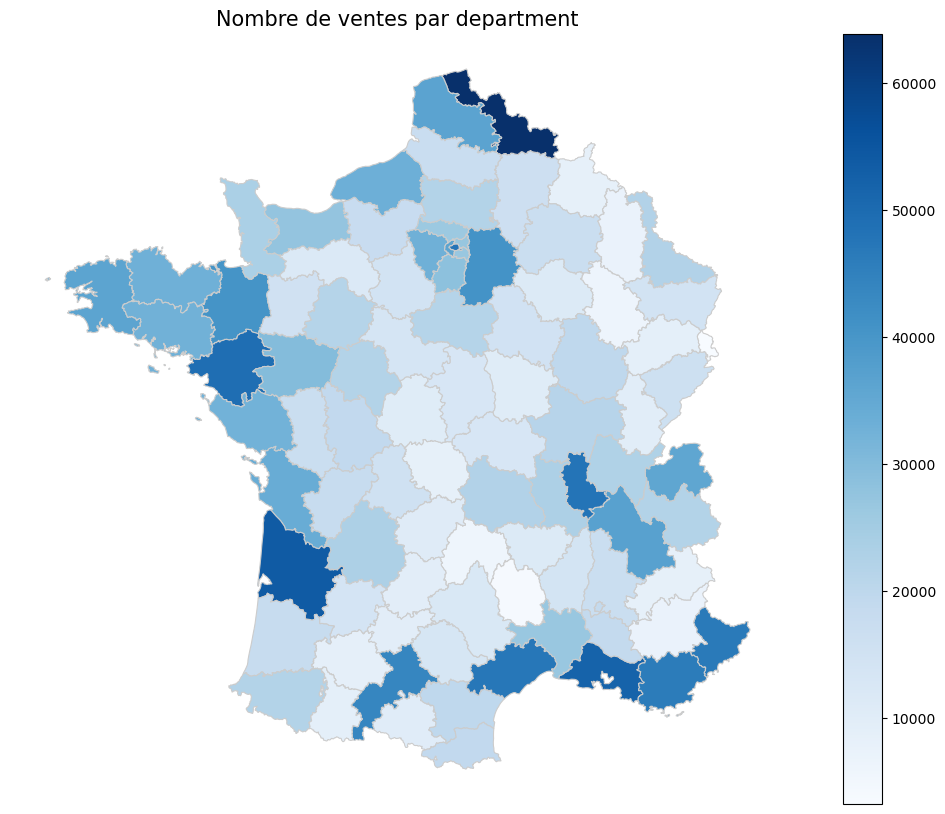

In [15]:
#on fusionne les deux dataset:
departement_df2 = geo_map_dep.merge(departement_df1, left_on='code', right_on='Code departement')

# poltting à l'aide de parametre trouvés sur le github
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
departement_df2.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


ax.set_title('Nombre de ventes par department', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()


plt.show()


Il y a plus de ventes en périphérie que le long de la diagonale, ce qui est logique puisque la diagonale est connue pour être très peu habitée. Nous remarquons également un nombre élevé de ventes en Île-de-France et aux alentours, ce qui est logique puisque c'est là où se trouve la capitale. En général, les ventes sont plus élevées là où il y a une forte densité de population, de tourisme, d'attractions et d'opportunités d'emploi.

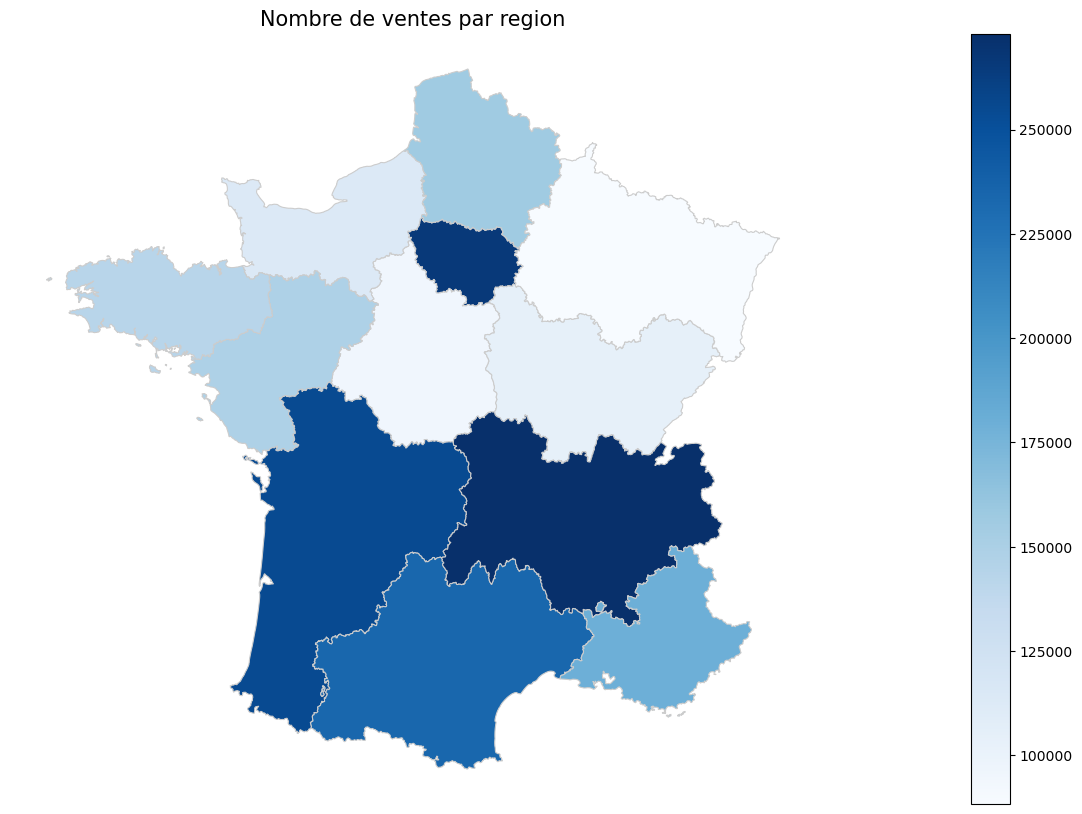

In [16]:
#Transformer ventes par region en dataframe
region_df1=ventes_par_region_22.reset_index()
region_df1['code_region'] = pd.to_numeric(region_df1['code_region'], errors='coerce').astype('Int64')
region_df1= region_df1.sort_values(by='code_region')

#carte de france: https://france-geojson.gregoiredavid.fr/
geojson_path2 = 'regions.geojson' 
geo_map_reg= gpd.read_file(geojson_path2)
geo_map_reg= geo_map_reg.sort_values(by='code')

#on enleve la corse et on met en forme la carte pour l'adapter a notre dataset
geo_map_reg = geo_map_reg[~geo_map_reg['code'].isin(['2A', '2B'])]
geo_map_reg['code'] = geo_map_reg['code'].astype('int64')
#

#on fusionne les deux dataset:
region_df2 = geo_map_reg.merge(region_df1, left_on='code', right_on='code_region')
#on retire les regions hors france mteropolitaine pour la simple raison de voire clairement la carte
region_df2=region_df2[~region_df2['code'].isin([1,2,3,4])]

# poltting à l'aide de parametre trouvés sur le github
fig, ax = plt.subplots(figsize=(40, 10))
region_df2.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


ax.set_title('Nombre de ventes par region', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()


plt.show()



L'interprétation ici est ambiguë. Il est logique d'avoir un nombre élevé de ventes en Île-de-France et dans le sud. Cependant, il y a une incohérence autour de la diagonale. Cependant, cela peut s'expliquer par le fait que la diagonale (vers le sud) est une grande région, ce qui explique l'apparente augmentation du nombre de ventes dans cette zone.

### Analyse sur Paris en 2022:

In [17]:
#ANALYSE SUR PARIS
nb_ventes_paris=(df_2022['Code departement'] == 75).sum()
pourcentage_ventes_paris=(nb_ventes_paris/nb_ventes_2022)*100
print("le nombre de ventes fait a paris est ",nb_ventes_paris," et constitut {:.2f}% des ventes totales en 2022".format(pourcentage_ventes_paris))

#Repartition des ventes sur Paris 
nb_ventes_code_post=df_2022["Code postal"].value_counts()
nb_ventes_code_post_df=nb_ventes_code_post.reset_index()

nb_ventes_paris_arr_df=nb_ventes_code_post_df[nb_ventes_code_post_df['Code postal']>=75000]
nb_ventes_paris_arr_df=nb_ventes_paris_arr_df[nb_ventes_paris_arr_df['Code postal']<=75020]

#Plot Graph
pourcentage_arr = px.pie(nb_ventes_paris_arr_df, names='Code postal', values='count', title='Repartition des ventes sur Paris')
pourcentage_arr.show()

#Plot histogramme
nb_ventes_paris_arr_df["arrondissement"]=nb_ventes_paris_arr_df["Code postal"]-75000
fig_arr = px.bar(nb_ventes_paris_arr_df, y='arrondissement', x='count', orientation='h', title="Nombre de ventes a Paris en fonction de l'arrondissement en 2022")
fig_arr.show()

le nombre de ventes fait a paris est  47826  et constitut 2.30% des ventes totales en 2022


Le nombre de ventes immobilières dans le 15e arrondissement est les plus élevé. Le 15e a une excellente réputation en tant que quartier agréable, idéal pour les familles. C'est aussi le plus grand arrondissement de Paris et est bien desservi par les transports en commun. Toutes ces choses font que le 15e est le plus attirant à Paris pour beaucoup de gens.


### Top 3 communes pour les locaux indsutriels, commerciales et assimilés


In [18]:
#donnees concernant les locaux indsutriels, commerciales et assimilés
locaux_ind_df22=df_2022[df_2022['Type local']=="Local industriel. commercial ou assimilé"]
#locaux_ind_df22.shape[0] -->correspond bien aux nombre de ventes trouver pour ce type de bien

ventes_ind_par_commune_22 = locaux_ind_df22['Commune'].value_counts()
top_3_commune_ind_df22 = ventes_ind_par_commune_22.head(3)
top_3_commune__ind_df22 = top_3_commune_ind_df22.reset_index()
top_3_commune__ind_df22.columns = ['Commune', 'Nombre de Ventes']

fig_top3 = px.bar(top_3_commune__ind_df22, y='Nombre de Ventes', x='Commune', title="Top 3 Commune en nombre de ventes de locaux indsutriels,\ncommerciales et assimilés en 2022")
fig_top3.show()

Les données semblent bien refléter la réalité, en particulier pour Toulouse. La commune se situant dans le top 3 n'est pas étonnante, étant donné sa renommée dans les industries de pointe de l'aéronautique et du spatial. Quant à Nice, en tant qu'espace touristique, il est normal d'observer un nombre plus élevé de ventes dans l'immobilier commercial et assimilé.

## Analyse sur le prix/m2 en 2022

In [19]:
#On ajoute une colonne Prix par metre carré:


condition_vente = df_2022['Nature mutation'].isin(['Vente', 'Vente en l\'état futur d\'achèvement'])
#On verifie que c'est une vente ou une vente qui attent achevement

#si cest un de ces deux cas alors on divise par la surface reelle bati, sinon on divise par la somme des surface carrez des lots.
df_2022['Prix par metre carre'] = np.where(
    condition_vente & (df_2022['Surface reelle bati'] > 5),
    df_2022['Valeur fonciere'] / df_2022['Surface reelle bati'],
    np.where(
        (df_2022[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].sum(axis=1) > 5),
        df_2022['Valeur fonciere'] / df_2022[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].sum(axis=1),
        np.nan
    )
)
#si on à pas de valeur pertinente on retourne rien (np.nan)

In [20]:
#df_2022.info() #on verufue ajout de la colonne

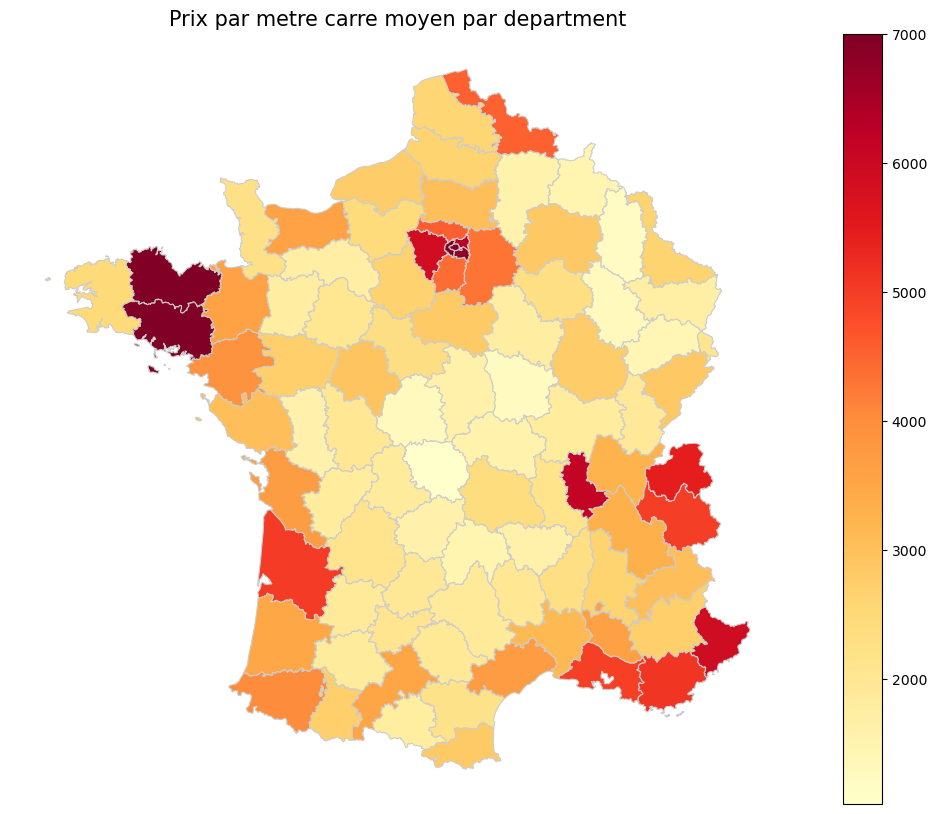

In [21]:
mean_prices = df_2022.groupby('Code departement')['Prix par metre carre'].mean().reset_index()
mean_prices.head()

exclude_codes = [971, 972, 973, 974]

# ces departements ne figurent ni dans notre analyse ni sur la carte.
mean_prices = mean_prices[~mean_prices['Code departement'].isin(exclude_codes)]
pd.unique(mean_prices['Prix par metre carre'])

geo_map_prix = gpd.read_file(geojson_path)
geo_map_prix= geo_map_prix.sort_values(by='code')
#on enleve la corse et on met en forme la carte pour l'adapter au dataset dep/m2
geo_map_prix = geo_map_prix[~geo_map_prix['code'].isin(['2A', '2B'])]
geo_map_prix['code'] = geo_map_prix['code'].astype('int64')

#on fusionne (merge) la carte avec le dataset recemment crée
merged_data = geo_map_prix.merge(mean_prices, left_on='code', right_on='Code departement')
#merged_data = merged_data[merged_data['Prix par metre carre'] <= 10000] les départements s'affichaient pas
merged_data['Prix par metre carre'] = merged_data['Prix par metre carre'].apply(lambda x: min(x, 7000)) 
#les departements ayants un prix par metre carre moyen superieur à 7000 prennent pour valeur 7000 pour plus de clareté.
#on a choisi  7000 car au delas seulement deux departememnts étaient colorés et préponderaient et en deça tous les departements étaient rouges.


# poltting à l'aide de parametre trouvés sur le github
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Prix par metre carre', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


ax.set_title('Prix par metre carre moyen par department', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()


plt.show()

on constate que les departements côtiés (près de la mer) et les départements frontaliers (près des frontieres) possèdent un prix moyen du m2 plus élevé que dans les terres internes comme la diagonale du vide. En effet la diagonale du vide est connue pour son appauvrissement, ce qui est remarquable ici. La cote d'Azur semble posseder de nombreux departements ayant un prix de m2 moyen cher, ce qui est tout à fait analogue à la realité (tout comme bordeaux). L'Ile de france et Paris sont eux aussi très chers comparés aux autres departements, ce qui est encore une fois logique.

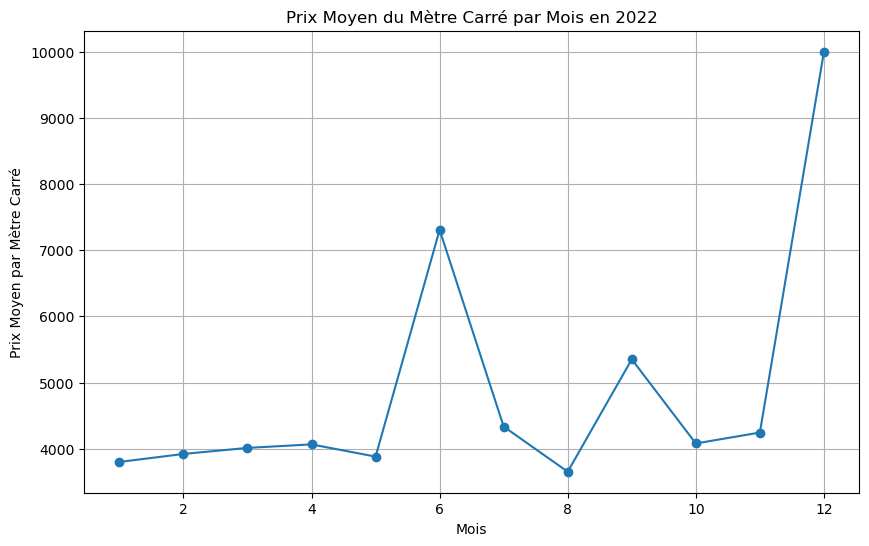

In [22]:
# On extract les mois pour ajouter une colonne
df_2022['Mois'] = df_2022['Date mutation'].dt.month

# Calcule prix moyen par mois
prix_par_mois = df_2022.groupby('Mois')['Prix par metre carre'].mean().reset_index()

cap_value = 10000  

# Appliquer le plafond à la valeur à toute valeur dépassant le plafond cap_value
prix_par_mois['Prix par metre carre'] = prix_par_mois['Prix par metre carre'].apply(lambda x: min(x, cap_value))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(prix_par_mois['Mois'], prix_par_mois['Prix par metre carre'], marker='o')
plt.title('Prix Moyen du Mètre Carré par Mois en 2022')
plt.xlabel('Mois')
plt.ylabel('Prix Moyen par Mètre Carré')
plt.grid(True)
plt.xticks()
plt.show()

On remarque une hausse des prix en juin et en décembre. Cette augmentation pourrait être liée à une demande plus élevée ou à des dynamiques de marché vers la fin de l'année, comme on l'a observé dans le graphique des ventes par mois. Les mois de juin, juillet et décembre ont enregistré le plus grand nombre de ventes. Cette hausse des prix pourrait être influencée par des facteurs tels que les vacances, les primes de fin d'année, ou des personnes cherchant à prendre des décisions liées à la propriété avant la fin de l'année.

# Analyse des données pour l'année 2019 et comparaisons avec 2022

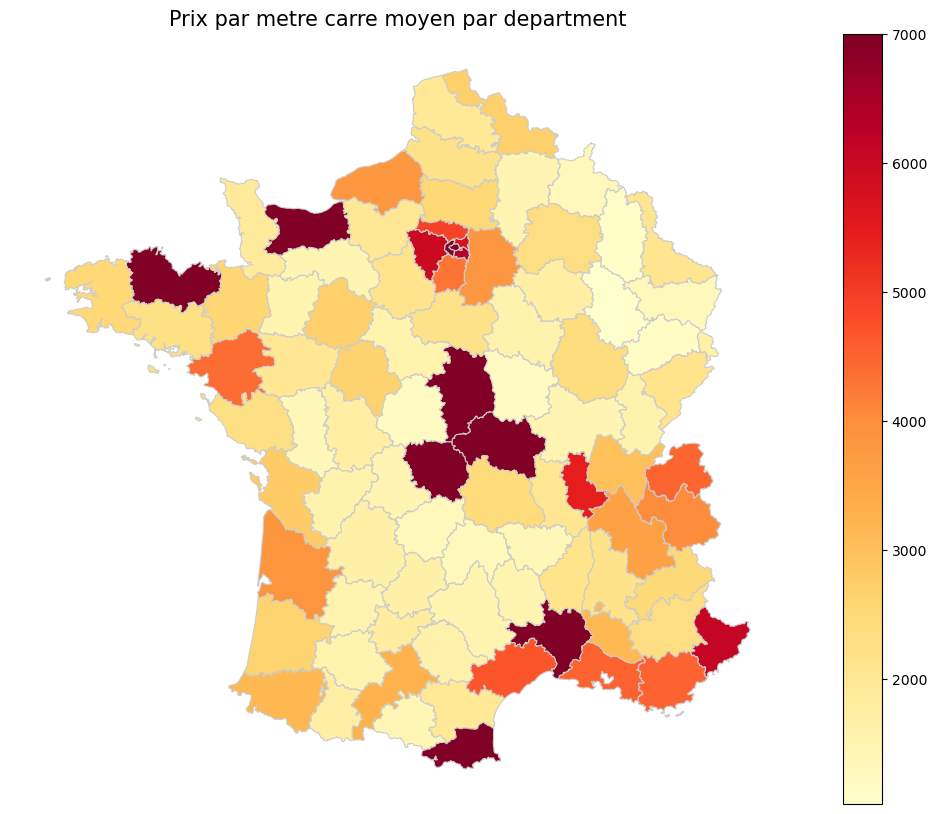

In [23]:
condition_vente19 = df_2019['Nature mutation'].isin(['Vente', 'Vente en l\'état futur d\'achèvement'])

#calcule prix/m2
df_2019['Prix par metre carre'] = np.where(
    condition_vente19 & (df_2019['Surface reelle bati'] > 5),
    df_2019['Valeur fonciere'] / df_2019['Surface reelle bati'],
    np.where(
        (df_2019[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].sum(axis=1) > 5),
        df_2019['Valeur fonciere'] / df_2019[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].sum(axis=1),
        np.nan
    )
)

#calcule des moyens en fonction du departement
mean_prices19 = df_2019.groupby('Code departement')['Prix par metre carre'].mean().reset_index()
mean_prices19.head()

exclude_codes = [971, 972, 973, 974]

mean_prices19 = mean_prices19[~mean_prices19['Code departement'].isin(exclude_codes)]
pd.unique(mean_prices19['Prix par metre carre'])

geo_map19 = gpd.read_file(geojson_path) #geojson_path deja defini plus haut
geo_map19 = geo_map19.sort_values(by='code')

geo_map19 = geo_map19[~geo_map19['code'].isin(['2A', '2B'])]
geo_map19['code'] = geo_map19['code'].astype('int64')

merged_data19 = geo_map19.merge(mean_prices19, left_on='code', right_on='Code departement')

merged_data19['Prix par metre carre'] = merged_data19['Prix par metre carre'].apply(lambda x: min(x, 7000)) 
#les departements ayants un prix par metre carre moyen superieur à 7000 prennent pour valeur 7000 pour plus de clareté.
#on a choisi  7000 car au delas seulement deux departememnts étaient colorés et préponderaient et en deça tous les departements étaient rouges.


# poltting à l'aide de parametre trouvés sur le github
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data19.plot(column='Prix par metre carre', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


ax.set_title('Prix par metre carre moyen par department', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()


plt.show()

on constate que les departements côtiés (près de la mer) et les départements frontaliers (près des frontieres) possèdent un prix moyen du m2 LEGEREMENT plus élevé que dans les terres internes. On remarque cependant que le centre de la france possède un prix exorbitant comparé au départements adjacents. La cote d'Azur semble toujours posseder de nombreux departements ayant un prix de m2 moyen cher, ce qui est tout à fait analogue à la realité (mais bordeaux coute moins cher). L'Ile de france et Paris sont eux aussi très chers comparés aux autres departements, ce qui est encore une fois logique.

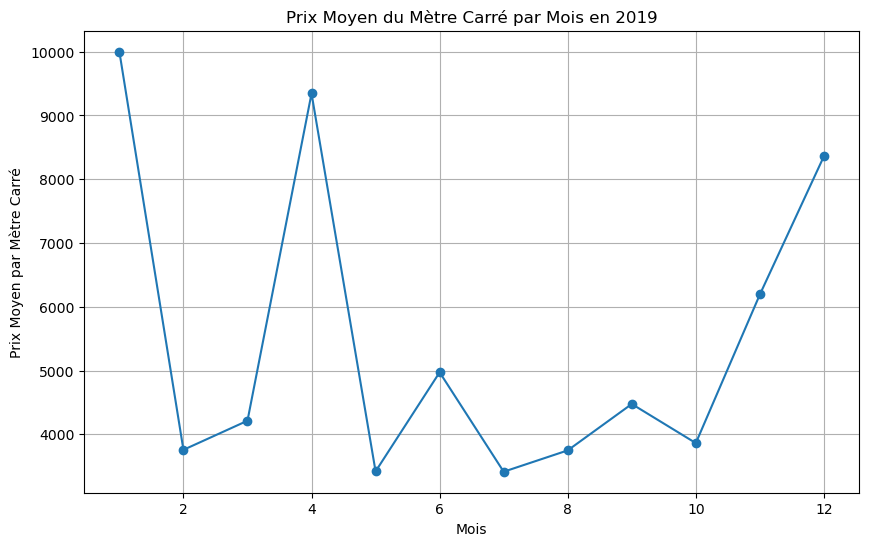

In [24]:
df_2019['Date mutation'] = pd.to_datetime(df_2019['Date mutation'], format='%d/%m/%Y')


df_2019['Mois'] = df_2019['Date mutation'].dt.month


prix_par_mois19 = df_2019.groupby('Mois')['Prix par metre carre'].mean().reset_index()

cap_value19 = 10000  


prix_par_mois19['Prix par metre carre'] = prix_par_mois19['Prix par metre carre'].apply(lambda x: min(x, cap_value19))


plt.figure(figsize=(10, 6))
plt.plot(prix_par_mois['Mois'], prix_par_mois19['Prix par metre carre'], marker='o')
plt.title('Prix Moyen du Mètre Carré par Mois en 2019')
plt.xlabel('Mois')
plt.ylabel('Prix Moyen par Mètre Carré')
plt.grid(True)
plt.xticks() 
plt.show()

## comparaison top 5 ventes

In [25]:
#top 5 ventes en 2019 en fonction de ... 

#nombre de vente par commune
top_5_commune_19 = ventes_par_commune_19.head(5)
top_5_commune_df19 = top_5_commune_19.reset_index()
top_5_commune_df19.columns = ['Commune', 'Nombre de Ventes']
fig_com19 = px.treemap(top_5_commune_df19, path=['Commune'], values='Nombre de Ventes', height=350,
                 title='Top 5 Ventes par Commune en 2019', labels={'Commune': 'Commune', 'ventes_par_commune_19': 'Nombre de ventes'})
fig_com19.data[0].textinfo = 'label+text+value'



#DEPARTEMENT
top_5_departments_19 = ventes_par_departement_19.head(5)
top_5_departments_df19 = top_5_departments_19.reset_index()
top_5_departments_df19.columns = ['Code Departement', 'Nombre de Ventes']
fig_dep19 = px.treemap(top_5_departments_df19, path=['Code Departement'], values='Nombre de Ventes', height=350,
                 title='Top 5 Ventes par département en 2019', labels={'Code departement': 'Département', 'ventes_par_departement_19': 'Nombre de ventes'})
fig_dep19.data[0].textinfo = 'label+text+value'

#AFFICHAGE
fig_com19.show()
fig_dep19.show()


COMPARAISON:
Nous avons remarqué que les deux premières positions sont restées les mêmes les deux années. Pour les communes, les cinq premières sont occupées par les mêmes communes, mais pas dans le même ordre. En ce qui concerne le département, le 75 a pris la première place à la place du 69 entre 2019 et 2022.

In [26]:
df_2022 = pd.read_csv('2022_cleaned.csv', delimiter=',')
df_2019 = pd.read_csv('2019_cleaned.csv', delimiter=',')


df_2022['Date mutation'] = pd.to_datetime(df_2022['Date mutation'], format='%d/%m/%Y')


df_2022['Mois'] = df_2022['Date mutation'].dt.month

df_2019['Date mutation'] = pd.to_datetime(df_2019['Date mutation'], format='%d/%m/%Y')


df_2019['Mois'] = df_2019['Date mutation'].dt.month

C:\Users\Janin\AppData\Local\Temp\ipykernel_10888\3930549443.py:1: DtypeWarning:

Columns (15,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Janin\AppData\Local\Temp\ipykernel_10888\3930549443.py:2: DtypeWarning:

Columns (15,16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.



## comparaison du prix/m2 en 2022 vs 2019

In [27]:
# Calcule la différence de prix
diff_prix = pd.merge(mean_prices19, mean_prices, on='Code departement', suffixes=('_2019', '_2022'))
diff_prix['Prix par metre carre_2019'] = diff_prix['Prix par metre carre_2019'].clip(upper=cap_value19)
diff_prix['Prix par metre carre_2022'] = diff_prix['Prix par metre carre_2022'].clip(upper=7000)
diff_prix['Différence Prix'] = diff_prix['Prix par metre carre_2022'] - diff_prix['Prix par metre carre_2019']

#on match le type des codes (int)
diff_prix['Code departement'] = diff_prix['Code departement'].astype(int)


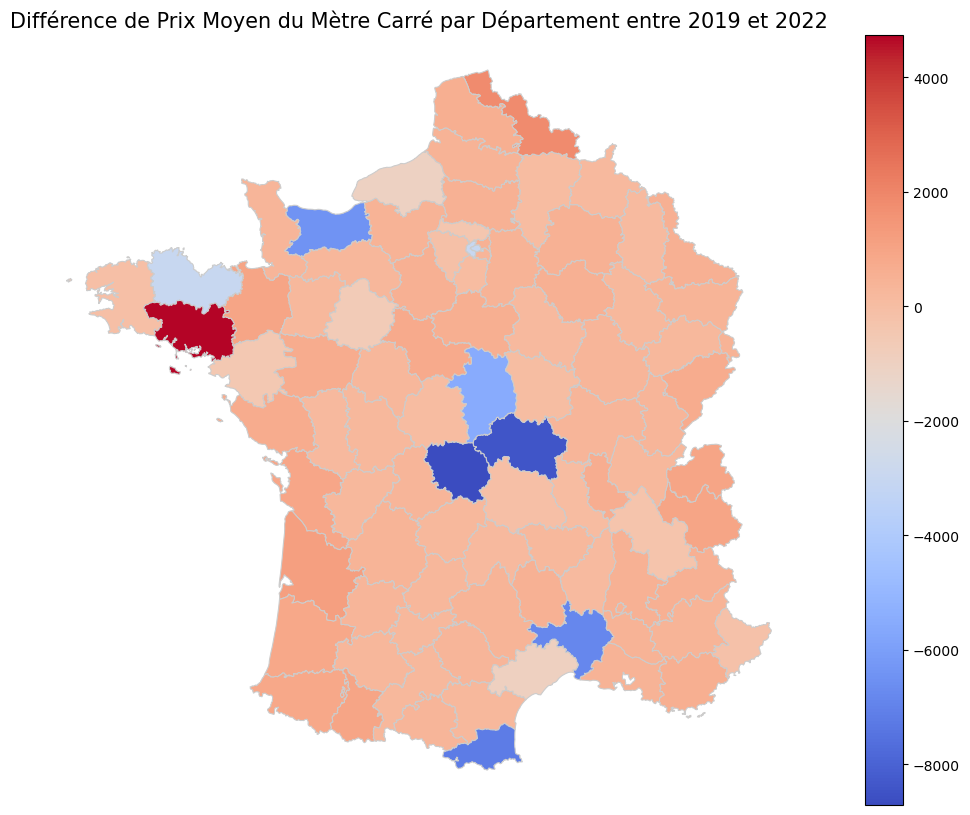

In [28]:
geo_mapC = gpd.read_file(geojson_path)
geo_mapC = geo_mapC.sort_values(by='code')

geo_mapC = geo_mapC[~geo_mapC['code'].isin(['2A', '2B'])]
geo_mapC['code'] = geo_mapC['code'].astype('int64')

C_geo_data = geo_mapC.merge(diff_prix, left_on='code', right_on='Code departement')

C_geo_data['Code departement'] = C_geo_data['Code departement'].astype('int64')

valeur_max = 300000  # Inutile car on les tronque précédemment
C_geo_data['Différence Prix'] = C_geo_data['Différence Prix'].clip(upper=valeur_max)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

divider = C_geo_data.plot(column='Différence Prix', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Différence de Prix Moyen du Mètre Carré par Département entre 2019 et 2022', fontdict={'fontsize': '15', 'fontweight' : '3'})

ax.set_axis_off()

plt.show()

Nous avons utiliser une palette de couleurs qui montre des valeurs positives en Rouge (augmentation de prix) et des valeurs négatives en Bleu (diminution de prix).

On constate que le prix à grandement diminué dans le centre de la France, peut-être qu'à cause de la crise du Covid, les habitants du centre qui est relativement campagnarde ont du déménager vers de plus grandes villes pour retrouver une vie plus stable. On ne constate pas de grandes évolutions vers l'ile de france. Généralement, le prix moyen du m2 en france à augementé dans la majorité des départements.

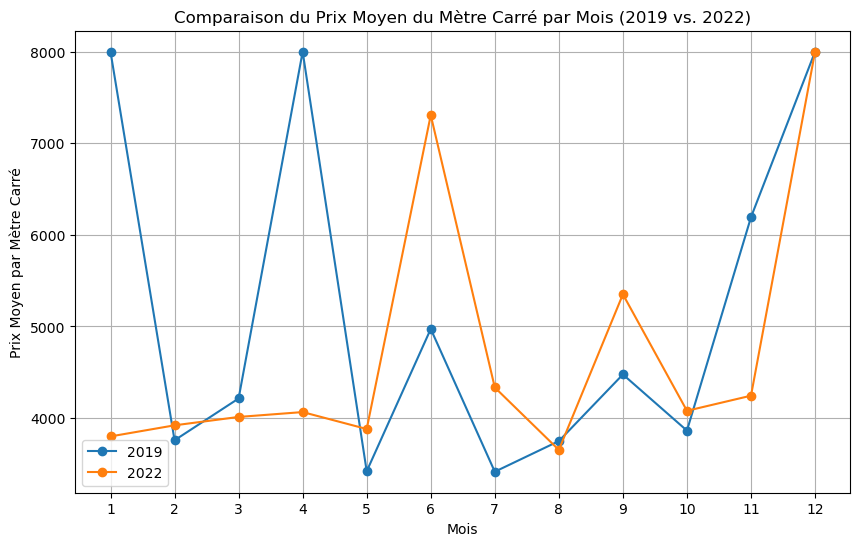

In [29]:
#cap_value22 = 7000
prix_par_mois['Prix par metre carre'] = prix_par_mois['Prix par metre carre'].apply(lambda x: min(x, 8000))
prix_par_mois19['Prix par metre carre'] = prix_par_mois19['Prix par metre carre'].apply(lambda x: min(x, 8000))

#graphique de comparaison
plt.figure(figsize=(10, 6))
plt.plot(prix_par_mois19['Mois'], prix_par_mois19['Prix par metre carre'], marker='o', label='2019')
plt.plot(prix_par_mois['Mois'], prix_par_mois['Prix par metre carre'], marker='o', label='2022')
plt.title('Comparaison du Prix Moyen du Mètre Carré par Mois (2019 vs. 2022)')
plt.xlabel('Mois')
plt.ylabel('Prix Moyen par Mètre Carré')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 13))  
plt.show()

On constate que pendant 2019 les prix augmentaient majoritairement de novembre à fevrier puis de mars à mai. En 2022 il y a une hausse mais uniquement en décembre concernant l'hiver et enfin une hausse de mai à Juillet concernant l'été. Le reste de l'année pour 2019 et 2022 semble foncièrement assez calme et stable.

## comparaison nombre de ventes

In [30]:
ventes22 = df_2022[df_2022['Nature mutation'].isin(['Vente', 'Vente en l\'état futur d\'achèvement'])]


ventes_mois22 = ventes22.groupby('Mois').size().reset_index()
ventes_mois22.columns = ['Mois', 'Nombre de Ventes en 2022']

ventes_mois22

Mois  Nombre de Ventes en 2022
0      1                    147813
1      2                    151472
2      3                    185695
3      4                    164084
4      5                    173824
5      6                    199417
6      7                    206142
7      8                    141688
8      9                    190231
9     10                    162046
10    11                    149601
11    12                    197365

In [31]:
ventes19 = df_2019[df_2019['Nature mutation'].isin(['Vente', 'Vente en l\'état futur d\'achèvement'])]

ventes_mois19 = ventes19.groupby('Mois').size().reset_index()
ventes_mois19.columns = ['Mois', 'Nombre de Ventes en 2019']
ventes_mois19

Mois  Nombre de Ventes en 2019
0      1                    134602
1      2                    132918
2      3                    151179
3      4                    149217
4      5                    146123
5      6                    163472
6      7                    204706
7      8                    131501
8      9                    167601
9     10                    179736
10    11                    145985
11    12                    200321

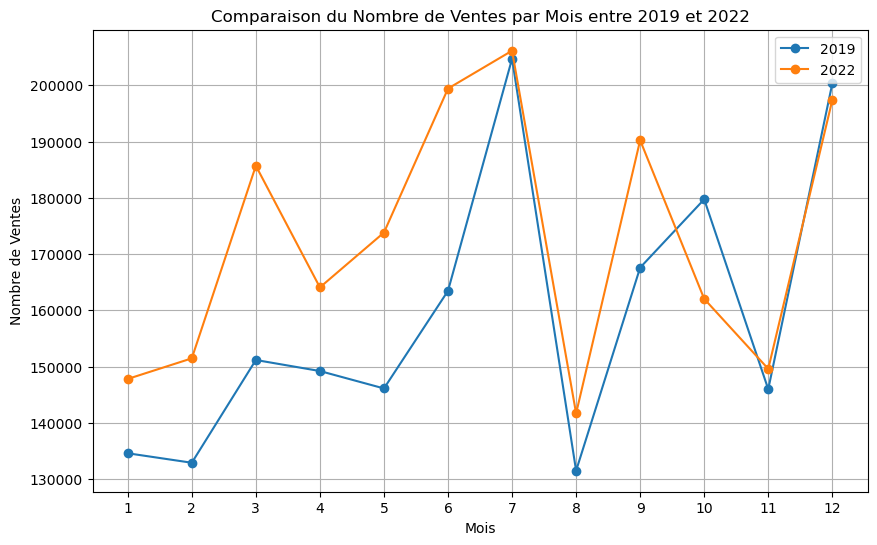

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(ventes_mois19['Mois'], ventes_mois19['Nombre de Ventes en 2019'], marker='o', label='2019')
plt.plot(ventes_mois22['Mois'], ventes_mois22['Nombre de Ventes en 2022'], marker='o', label='2022')
plt.title('Comparaison du Nombre de Ventes par Mois entre 2019 et 2022')
plt.xlabel('Mois')
plt.ylabel('Nombre de Ventes')
plt.grid(True)
plt.legend()
plt.xticks(range(1, 13)) 
plt.show()

Les deux courbes possèdent les même tendances de hausse et de baisse sur le long de l'année, avec une hausse en été (vers Juillet) et deux hausses en fin d'année en Septembre-Octobre et Decembre. Cela suit les habitudes foncières standard que l'on connait. On remarque cependant que le nombre de ventes dans la première moitié de l'année (c'est-à-dire de Janvier à Juillet) est bien plus élevé pour 2022 que pour 2019. Calculons la moyenne de la différence du nombre de ventes sur ces 7 mois:

In [33]:
firsthalf19 = ventes_mois19[(ventes_mois19['Mois'] >= 1) & (ventes_mois19['Mois'] <= 7)]
firsthalf22 = ventes_mois22[(ventes_mois22['Mois'] >= 1) & (ventes_mois22['Mois'] <= 7)]

firsthalf = firsthalf19.merge(firsthalf22, on='Mois')
firsthalf['Diff'] = firsthalf['Nombre de Ventes en 2022'] - firsthalf['Nombre de Ventes en 2019']
print(firsthalf)

   Mois  Nombre de Ventes en 2019  Nombre de Ventes en 2022   Diff
0     1                    134602                    147813  13211
1     2                    132918                    151472  18554
2     3                    151179                    185695  34516
3     4                    149217                    164084  14867
4     5                    146123                    173824  27701
5     6                    163472                    199417  35945
6     7                    204706                    206142   1436


In [34]:
firsthalf['Diff'].mean()

20890.0

Il y a en moyenne 20890 ventes de plus sur la première moitié de l'année entre 2019 et 2022. 

## comparaison de la repartition des ventes

In [35]:
#REPARTITION DES VENTES en 2019 PAR:

#NATURE DE MUTATION 
ventes_par_nature_mutation_df_2019 = ventes_par_nature_mutation_19.reset_index()
pourcentage_nature19 = px.pie(ventes_par_nature_mutation_df_2019, names="Nature mutation", values='count', title='Repartition des ventes par Nature de mutation en 2019')
pourcentage_nature19.show()


#TYPE DE BIEN
ventes_par_type_bien_df_19=ventes_par_type_bien_19.reset_index()
pourcentage_bien19 = px.pie(ventes_par_type_bien_df_19, names="Type local", values='count', title='Repartition des ventes par type de bien en 2019')
pourcentage_bien19.show()

En 2019, le nombre de maisons vendues était deux fois plus élevé que celui des appartements, une tendance qui s'est maintenue presque de manière similaire en 2022. Cependant, la part des maisons par rapport à l'ensemble des ventes était plus importante en 2019 qu'en 2022. Nous pouvons comparer le nombre de ventes ci-dessous :

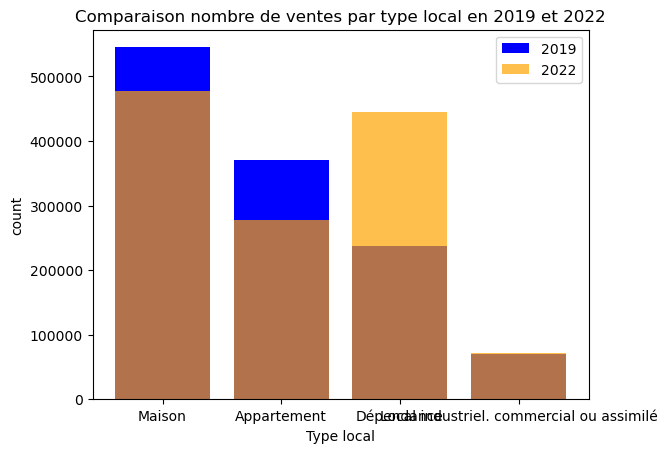

In [36]:
plt.bar(ventes_par_type_bien_df_19['Type local'], ventes_par_type_bien_df_19['count'], color='blue', label='2019')

plt.bar(ventes_par_type_bien_df_22['Type local'], ventes_par_type_bien_df_22['count'], color='orange', label='2022', alpha=0.7)  # alpha controls transparency

plt.xlabel('Type local')
plt.ylabel('count')
plt.title('Comparaison nombre de ventes par type local en 2019 et 2022')
plt.legend()  

plt.show()

Cet histogramme nous permet de constater qu'il y a pratiquement le même nombre de locaux industriels vendus. Il y a davantage de maisons et d'appartements en 2019, mais le double de dépendances en 2022, ce qui explique le nombre de ventes plus élevé en 2022.